# Data Cleaning and Preprocessing for TripAdvisor Restaurant Recommendation Data (USA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df_tripadvisor = pd.read_csv('TripAdvisor_RestaurantRecommendation.csv')

# Display first 10 rows
print("First 10 rows:")
print(df_tripadvisor.head(10))

First 10 rows:
                                    Name       Street Address  \
0          Betty Lou's Seafood and Grill     318 Columbus Ave   
1                      Coach House Diner        55 State Rt 4   
2                       Table Talk Diner  2521 South Rd Ste C   
3                            Sixty Vines     3701 Dallas Pkwy   
4                           The Clam Bar    3914 Brewerton Rd   
5                            E Tutto Qua     270 Columbus Ave   
6   Black Angus Steakhouse - Federal Way      2400 S 320th St   
7                               Ziziki's     11663 Preston Rd   
8  Vince's Italian Restaurant & Pizzeria  2815 NE Sunset Blvd   
9                 John Thomas Steakhouse        1152 Danby Rd   

                       Location                                          Type  \
0  San Francisco, CA 94133-3908   Seafood, Vegetarian Friendly, Vegan Options   
1     Hackensack, NJ 07601-6337          Diner, American, Vegetarian Friendly   
2   Poughkeepsie, NY 12601

In [3]:
# Display number of rows and columns
print(f"\nShape: {df_tripadvisor.shape[0]} rows, {df_tripadvisor.shape[1]} columns")

# Display statistics for numeric columns
print("\nStatistics for numeric columns:")
print(df_tripadvisor.describe())


Shape: 3062 rows, 11 columns

Statistics for numeric columns:
                   Name   Street Address                   Location  \
count              3062             3062                       3062   
unique             2641             2814                       2653   
top     Texas Roadhouse  3333 Bristol St  Costa Mesa, CA 92626-1873   
freq                 13                8                          8   

                                                Type           Reviews  \
count                                           3049              3062   
unique                                           669                 6   
top      Italian, Vegetarian Friendly, Vegan Options  4.5 of 5 bubbles   
freq                                             137              1956   

       No of Reviews                                           Comments  \
count           3062                                               2447   
unique           811                                        

In [4]:
# Filter restaurants from New York
df_ny = df_tripadvisor[df_tripadvisor['Location'].str.contains('NY', na=False)]

print(f"Number of restaurants in NY: {len(df_ny)}")
print(df_ny.head(10))

Number of restaurants in NY: 650
                      Name       Street Address  \
2         Table Talk Diner  2521 South Rd Ste C   
4             The Clam Bar    3914 Brewerton Rd   
9   John Thomas Steakhouse        1152 Danby Rd   
10           ZaZa's Cucina    622 Cascadilla St   
13    New World Bistro Bar     300 Delaware Ave   
18                Ravenous          21 Phila St   
27                    Beso       11 Schuyler St   
37               Del Posto      85 Tenth Avenue   
45          Havana Central  One Ridge Hill Blvd   
65      The Capital Grille        155 E 42nd St   

                           Location  \
2       Poughkeepsie, NY 12601-5476   
4                Syracuse, NY 13212   
9             Ithaca, NY 14850-8927   
10            Ithaca, NY 14850-4049   
13            Albany, NY 12209-1627   
18  Saratoga Springs, NY 12866-3104   
27     Staten Island, NY 10301-1952   
37          New York City, NY 10011   
45           Yonkers, NY 10710-7609   
65     New York

In [5]:
df_ny.columns
# Drop irrelevant columns
columns_to_drop = ['Trip_advisor Url', 'Menu']
df_ny = df_ny.drop(columns=columns_to_drop)


In [6]:
# Rename 'Reviews' column to 'Rating'
df_ny.rename(columns={'Reviews': 'Rating'}, inplace=True)
# Remove ' of 5 bubbles' text from 'Rating' column and convert to float
df_ny['Rating'] = df_ny['Rating'].str.replace(' of 5 bubbles', '').astype(float)

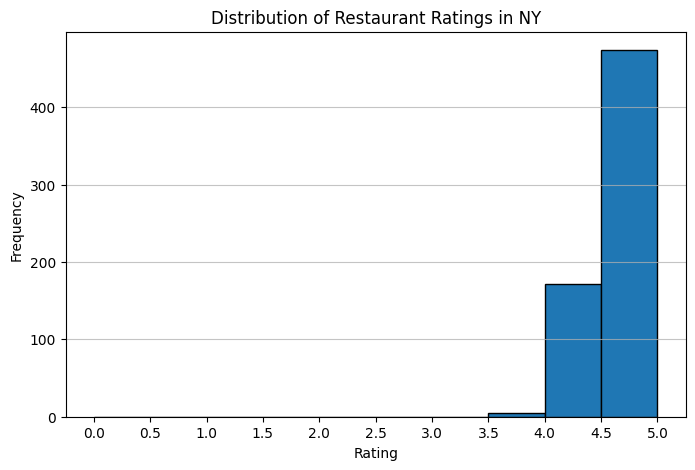

In [7]:
# Display the distribution of ratings
plt.figure(figsize=(8, 5))
plt.hist(df_ny['Rating'], bins=np.arange(0, 5.5, 0.5), edgecolor='black')
plt.title('Distribution of Restaurant Ratings in NY')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 5.5, 0.5))
plt.grid(axis='y', alpha=0.75)
plt.show()


In [8]:
# Remove ' reviews' text from 'No of Reviews' column
df_ny['No of Reviews'] = df_ny['No of Reviews'].str.replace(' reviews', '')

# Convert 'No of Reviews' column to numeric
df_ny['No of Reviews'] = pd.to_numeric(df_ny['No of Reviews'], errors='coerce')

In [9]:
# Check for missing values
df_ny.dropna(inplace=True, axis=0)
df_ny.reset_index(drop=True, inplace=True)

df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            593 non-null    object 
 1   Street Address  593 non-null    object 
 2   Location        593 non-null    object 
 3   Type            593 non-null    object 
 4   Rating          593 non-null    float64
 5   No of Reviews   593 non-null    float64
 6   Comments        593 non-null    object 
 7   Contact Number  593 non-null    object 
 8   Price_Range     593 non-null    object 
dtypes: float64(2), object(7)
memory usage: 41.8+ KB


In [10]:
def convert_price_range(value):
    parts = value.split(" - ")
    nums = [len(p.strip()) for p in parts]
    return sum(nums) / len(nums)

df_ny["Price"] = df_ny["Price_Range"].apply(convert_price_range)

# Statistics for 'Price' column
print("\nStatistics for 'Price' column:")
print(df_ny['Price'].describe())



Statistics for 'Price' column:
count    593.000000
mean       2.517707
std        0.710757
min        1.000000
25%        2.500000
50%        2.500000
75%        2.500000
max        4.000000
Name: Price, dtype: float64


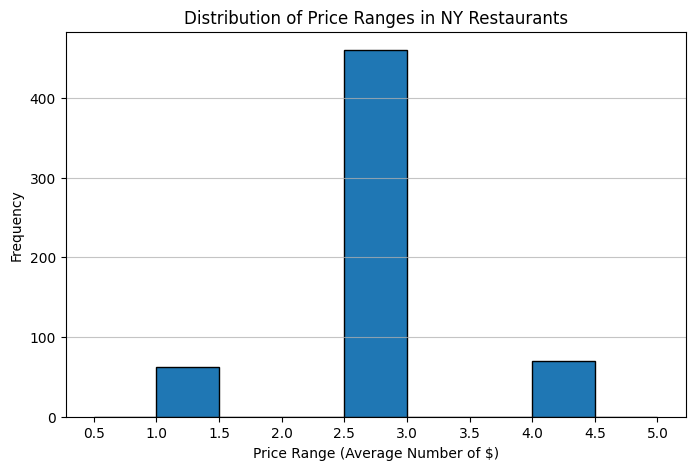

In [11]:
# Distribution of price ranges
plt.figure(figsize=(8, 5))
plt.hist(df_ny['Price'], bins=np.arange(0.5, 5.5, 0.5), edgecolor='black')
plt.title('Distribution of Price Ranges in NY Restaurants')
plt.xlabel('Price Range (Average Number of $)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.grid(axis='y', alpha=0.75)
plt.show()      

In [ ]:
# Drop 'Price_Range' column as it's no longer needed
df_ny.drop(columns=['Price_Range'], inplace=True)

# Combine Street Address and Location into a single 'Address' column
df_ny['Address'] = df_ny['Street Address'] + ', ' + df_ny['Location']

# Drop 'Street Address' and 'Location' columns
df_ny.drop(columns=['Street Address', 'Location'], inplace=True)

# Display the cleaned DataFrame
print(df_ny.head())


                     Name                                               Type  \
0        Table Talk Diner               American, Diner, Vegetarian Friendly   
1            The Clam Bar                             American, Bar, Seafood   
2  John Thomas Steakhouse          American, Steakhouse, Gluten Free Options   
3           ZaZa's Cucina   Italian, Vegetarian Friendly, Gluten Free Opt...   
4    New World Bistro Bar                 American, Bar, Vegetarian Friendly   

   Rating  No of Reviews                                           Comments  \
0     4.0          256.0  Waitress was very friendly but a little pricey...   
1     4.0          285.0  Doesn't look like much from the outside but wa...   
2     4.0          258.0  The ambience, food and service were all excell...   
3     4.0          271.0  Nice big dining area.  Holds many people, so n...   
4     4.5          706.0  Came with a group of eight people, and had a w...   

    Contact Number  Price                   

In [13]:
# Export the cleaned DataFrame to a new CSV file
df_ny.to_csv('cleaned_tripadvisor_ny_restaurants.csv', index=False)